# Storytelling Data Visualization on Exchange Rates

The purpose of this project is to explore plt.subplots to generate  detailed visual representations of data.  We will examine the exchange rates and how they were impacted by the 2008 housing crash as well as Bush, Obama and Trump's past presidential terms.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
exchange_rates = pd.read_csv("euro-daily-hist_1999_2020.csv")

#importing modules and dataset

### Reviewing Source Data

In [2]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

Based on a quick review of the data above it appears there are a total of 5,699 rows.  Many columns/countries have null values and the the majority are objects vs numeric values

In [3]:
exchange_rates.head()

#reviewing the top 5 rows of the dataset

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


### Data Cleaning

In [4]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

#changes column names, converts time to datetime, sorts DF by time and resets the index

In [5]:
euro_to_dollar = exchange_rates[["Time","US_dollar"]].copy()
euro_to_dollar["US_dollar"].value_counts()

#pulls time and US exchange rates only.  Shows non-numeric values to be "-"

-         62
1.2276     9
1.1215     8
1.1305     7
1.1797     6
          ..
0.8906     1
1.5746     1
1.1125     1
0.8824     1
0.9561     1
Name: US_dollar, Length: 3528, dtype: int64

In [6]:
euro_to_dollar = euro_to_dollar[euro_to_dollar["US_dollar"] != "-"]
euro_to_dollar["US_dollar"] = euro_to_dollar["US_dollar"].astype(float)

#filters dataframe to remove "-" values and converts type to float

In [7]:
euro_to_dollar["US_dollar"].value_counts()

#confirms values were removed and new length is correct

1.2276    9
1.1215    8
1.1305    7
1.1268    6
1.3373    6
         ..
1.4639    1
1.5206    1
1.3272    1
0.8591    1
0.9375    1
Name: US_dollar, Length: 3527, dtype: int64

### Generating Source Data for Plots

In [8]:
euro_to_dollar["rolling_mean"] = euro_to_dollar["US_dollar"].rolling(30).mean()

#calculates a rolling mean in 30 day increments

In [9]:
exchange_2008 = euro_to_dollar[(euro_to_dollar["Time"].dt.year >= 2007)
                              & (euro_to_dollar["Time"].dt.year <= 2008)]

range_2008 = euro_to_dollar[(euro_to_dollar["Time"].dt.year >= 2006)
                              & (euro_to_dollar["Time"].dt.year <= 2010)]

#creates a DF for the 2007-2008 financial crisis

In [30]:
bush = euro_to_dollar[(euro_to_dollar["Time"].dt.year >= 2001)
                              & (euro_to_dollar["Time"].dt.year < 2009)]

obama = euro_to_dollar[(euro_to_dollar["Time"].dt.year >= 2009)
                              & (euro_to_dollar["Time"].dt.year < 2017)]

trump = euro_to_dollar[(euro_to_dollar["Time"].dt.year >= 2017)
                              & (euro_to_dollar["Time"].dt.year < 2021)]

#creates three separate datasets for the presidential terms

### Housing 2008 Crash Exchange Rate Plot

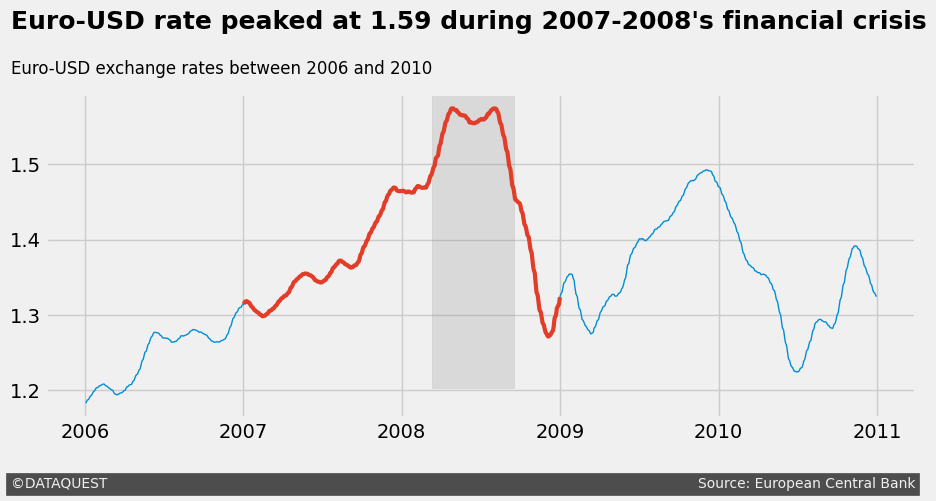

In [43]:
import matplotlib.style as style
style.use('fivethirtyeight') 

#imports the grid style

fig,ax = plt.subplots(figsize=(10,4))
ax.plot(range_2008['Time'],
        range_2008['rolling_mean'],
        linewidth=1) 

#creates a line plot utilizing date range defined above

ax.plot(exchange_2008['Time'],
        exchange_2008['rolling_mean'],
        linewidth=3, color='#e23d28') 

#plots 2007 - 2008 in red

ax.text(732140, 1.68, "Euro-USD rate peaked at 1.59 during 2007-2008's financial crisis",
        weight='bold', size = 18) 

#plots main title.  700K number had to guess as it is something odd with the datetime

ax.text(732140, 1.62, 'Euro-USD exchange rates between 2006 and 2010',
        size=12) 

#sub title

ax.axvspan(xmin=733112.0, xmax=733302.0, ymin=0.09,
           alpha=0.2, color='grey') 

#highlighting peak rate exchange

ax.text(732140, 1.07, '©DATAQUEST' + ' '*135 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

#footer text

plt.show()

### Exchange rate by President Plot

Text(729916.0, 0.65, '©DATAQUEST                                                                                                       Source: European Central Bank')

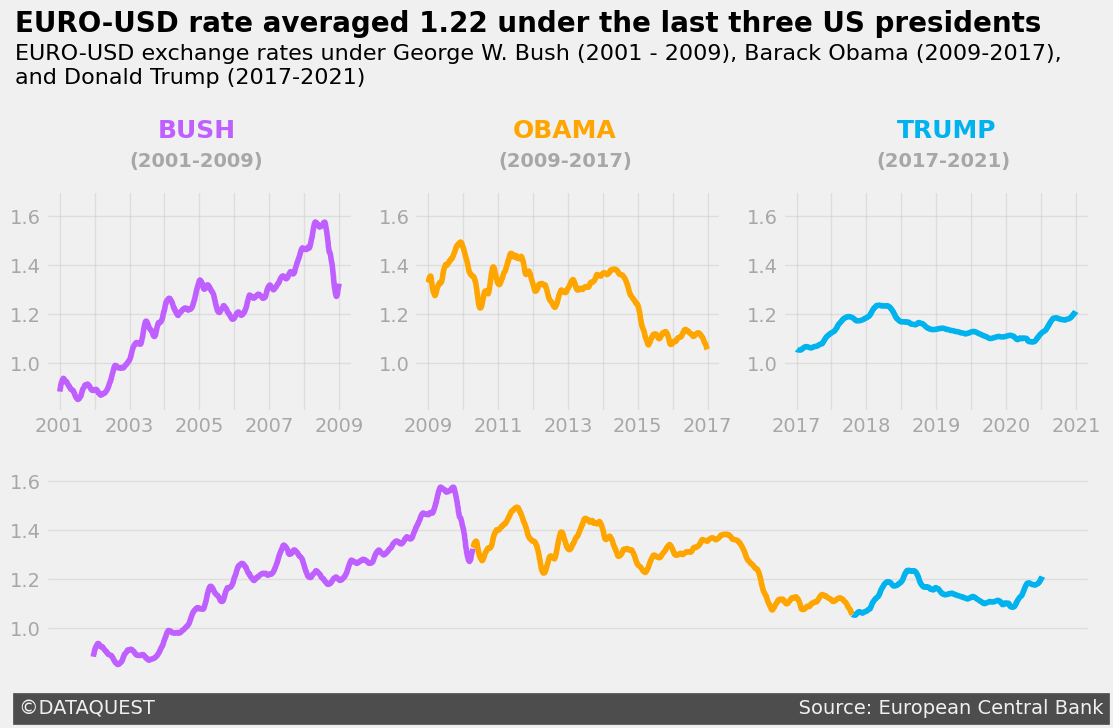

In [40]:
style.use('fivethirtyeight')

#Imports the grid style

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

#Adding the subplots

for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2','1.4', '1.6'],
                   alpha=.3)
    ax.grid(alpha=.5)    
    
#Changes to all the subplots
    
ax1.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax1.set_xticklabels(['', '2001', '', '2003', '', '2005', '',
                     '2007', '', '2009'],
                   alpha=0.3)
ax1.text(731516.0, 1.92, 'BUSH', fontsize=18, weight='bold',
        color='#BF5FFF')
ax1.text(731216.0, 1.8, '(2001-2009)', weight='bold',
        alpha=0.3)

#Plotting Bush Data

ax2.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax2.set_xticklabels(['', '2009', '', '2011', '', '2013', '',
                     '2015', '', '2017'],
                   alpha=0.3)
ax2.text(734288.0, 1.92, 'OBAMA', fontsize=18, weight='bold',
        color='#ffa500')
ax2.text(734138.0, 1.8, '(2009-2017)', weight='bold',
         alpha=0.3)

#PLotting Obama Data

ax3.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax3.set_xticklabels(['2017', '', '2018', '', '2019', '',
                     '2020', '', '2021'],
                   alpha=0.3)
ax3.text(736855.0, 1.92, 'TRUMP', fontsize=18, weight='bold',
        color='#00B2EE')
ax3.text(736745.0, 1.8, '(2017-2021)', weight='bold',
         alpha=0.3)

#Plotting Trump Data

ax4.plot(bush['Time'], bush['rolling_mean'],
        color='#BF5FFF')
ax4.plot(obama['Time'], obama['rolling_mean'],
        color='#ffa500')
ax4.plot(trump['Time'], trump['rolling_mean'],
        color='#00B2EE')
ax4.grid(alpha=0.5)
ax4.set_xticks([])

#Plotting trump, bush and obama in one graph

ax1.text(730016.0, 2.35, 'EURO-USD rate averaged 1.22 under the last three US presidents',
         fontsize=20, weight='bold')
ax1.text(730016.0, 2.14, '''EURO-USD exchange rates under George W. Bush (2001 - 2009), Barack Obama (2009-2017),
and Donald Trump (2017-2021)''',
        fontsize=16)

#Adding a title and a subtitle

ax4.text(729916.0, 0.65, '©DATAQUEST' + ' '*103 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=14)

#Adding a signature